In [1]:
# Для (((работающего))) слайдера
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [2]:
pCurrent = 10
pMin = 0
pMax = 100

value = 10
# Левая граница графика
start = -np.sqrt(value)
# Правая граница графика
end = np.sqrt(value)

# Значения x для графика
values = np.arange(start, end, 0.001)

In [3]:
# Теория: https://dic.academic.ru/dic.nsf/enc_physics/3649/КРОНИГА
# Упрощенная (b -> 0, V -> ∞) функция энергетических зон кристалла
def f(alpha, a, P):
    return np.cos(alpha * a) + P * np.sin(alpha * a) / (alpha * a)

In [4]:
# Вычисление половины значений функции энергетических зон
def calculateGraph(P, isLeft):
    multiplier = -1 if isLeft else 1
    return plt.plot(values * (multiplier * values), f(values, values, P), color='C0', linewidth=2)

In [5]:
# Вычисление всех значений функции энергетических зон
def calculateWholeGraph(P):
    leftPart, = calculateGraph(P, False)
    rightPart, = calculateGraph(P, True)
    return [leftPart, rightPart]

In [6]:
# Вычисление половины значений поддерживающих линий.
# Они, в отличие от полос, могут принимать значения -1, 0, 1
# И служат лишь для большей наглядности
def calculateSupportLines(P, isLeft):
    multiplier = -1 if isLeft else 1
    return plt.plot(values * (multiplier * values), [-1 if f(i, i, P) < -1 else 1 if f(i, i, P) > 1 else 0 for i in values], color='black', linewidth=1)

In [7]:
# Вычисление всех значений поддерживающих линий
def calculateWholeSupportLines(P):
    leftPart, = calculateSupportLines(P, True)
    rightPart, = calculateSupportLines(P, False)
    return [leftPart, rightPart]

In [8]:
# Вычисление половины разрешенных (полосы) и запрещенных (впадины) значений
def calculateBars(P, isLeft):
    multiplier = -1 if isLeft else 1
    return plt.plot(values * (multiplier * values), [1 if abs(f(i, i, P)) < 1 else 0 for i in values], color='red', linewidth=1)

In [9]:
# Вычисление всех значений полос и впадин
def calculateWholeBars(P):
    leftPart, = calculateBars(P, False)
    rightPart, = calculateBars(P, True)
    return [leftPart, rightPart]

In [10]:
# Обновление всех параметров после изменения значения ползунка
def update(sliderValue):
    supportLinesValues = [-1 if f(i, i, sliderValue) < -1 else 1 if f(i, i, sliderValue) > 1 else 0 for i in values]
    barsValues = [1 if abs(f(i, i, sliderValue)) < 1 else 0 for i in values]
    percent.set_text(f"{barsValues.count(0) / len(barsValues) * 100 : .2f}" + "%")

    for p in lines[0]:
        p.set_ydata(f(values, values, sliderValue))

    for p in lines[1]:
        p.set_ydata(supportLinesValues)
        
    for p in lines[2]:
        p.set_ydata(barsValues)

    fig.canvas.draw_idle()

<IPython.core.display.Javascript object>


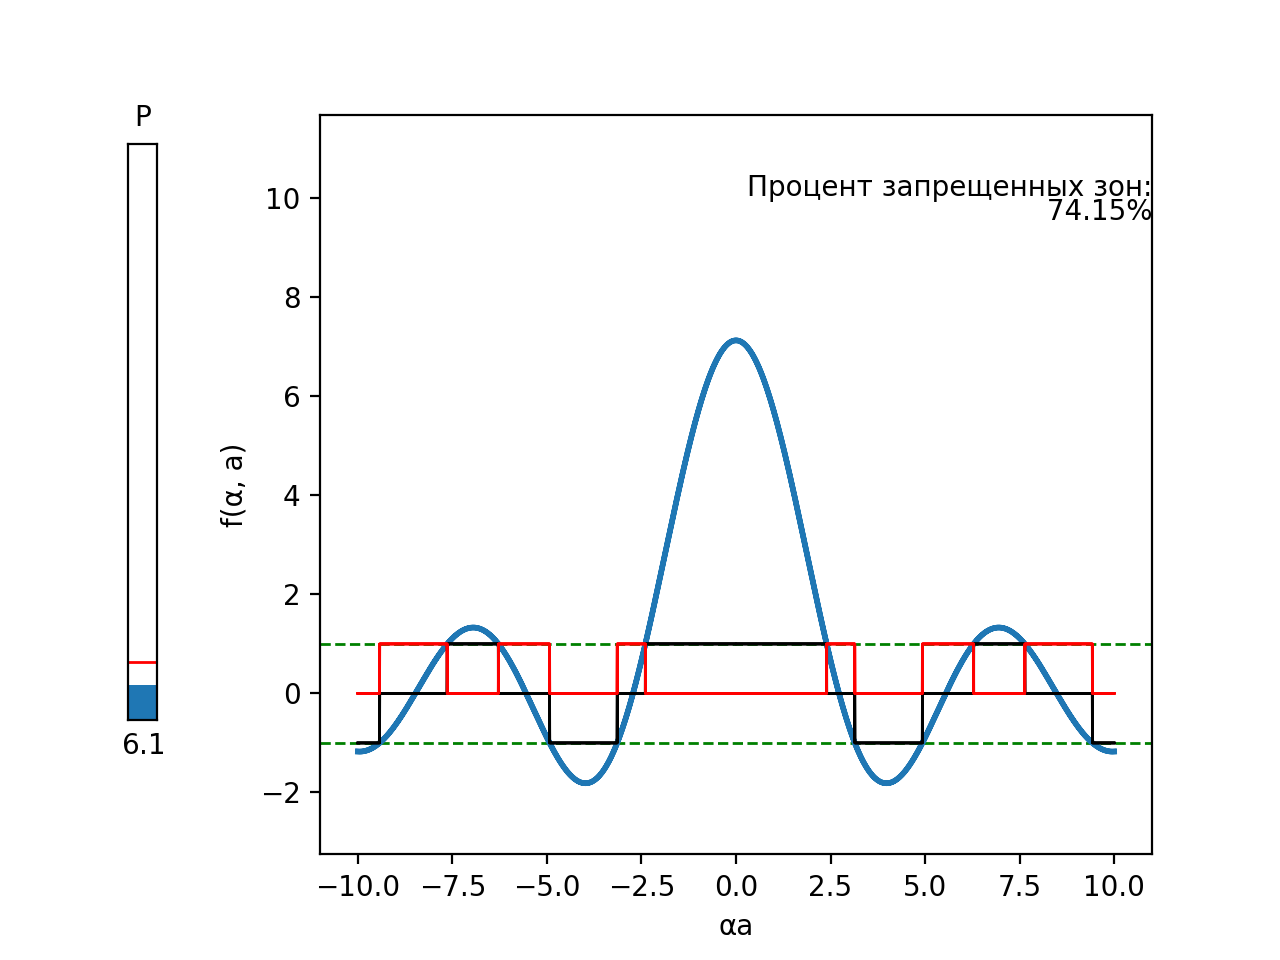

In [11]:
fig, ax = plt.subplots()

ax.set_xlabel('αa')
ax.set_ylabel('f(α, a)')

plt.axhline(y=1, linestyle="--", c='green', linewidth = 1)
plt.axhline(y=-1, linestyle="--", c='green', linewidth = 1)

lines = [calculateWholeGraph(pCurrent), calculateWholeSupportLines(pCurrent), calculateWholeBars(pCurrent)]

plt.text(11, 10.5, "Процент запрещенных зон:", horizontalalignment='right', verticalalignment='top')
barsValues = [1 if abs(f(i, i, pCurrent)) < 1 else 0 for i in values]
percent = plt.text(11, 10, f"{barsValues.count(0) / len(barsValues) * 100 : .2f}" + "%", horizontalalignment='right', verticalalignment='top')

plt.subplots_adjust(left=0.25)

pSlider = Slider(ax=plt.axes([0.1, 0.25, 0.0225, 0.6]), label="P", valmin=pMin, valmax=pMax, valinit=pCurrent, orientation="vertical")
pSlider.on_changed(update)

plt.show()